In [53]:
# !pip install netCDF4 h5netcdf


In [ ]:
# pip install --upgrade xarray


In [ ]:
# pip install dash

In [1]:
import xarray as xr

file_path = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/TOTA.nc'
try:
    ds = xr.open_dataset(file_path)
    print("Archivo NetCDF abierto con éxito.")
except Exception as e:
    print(f"Error al abrir el archivo NetCDF: {e}")


Archivo NetCDF abierto con éxito.


In [2]:
import xarray as xr

ds = xr.open_dataset('/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/TOTA.nc')

print(ds)

print("\nDimensiones:")
print(ds.dims)

print("\nCoordenadas:")
print(ds.coords)

print("\nVariables:")
print(ds.data_vars)

print("\nAtributos globales:")
print(ds.attrs)


<xarray.Dataset>
Dimensions:         (time: 1, reference_time: 1, x: 145, y: 95)
Coordinates:
  * time            (time) datetime64[ns] 2023-11-04T04:00:00
  * reference_time  (reference_time) datetime64[ns] 2023-11-04T03:00:00
  * x               (x) float64 -1.44e+05 -1.42e+05 ... 1.42e+05 1.44e+05
  * y               (y) float64 -1.639e+06 -1.637e+06 ... -1.453e+06 -1.451e+06
Data variables: (12/15)
    crs             |S1 ...
    stc1            (time, y, x) float32 ...
    smc1            (time, y, x) float32 ...
    sh2ox1          (time, y, x) float32 ...
    stc2            (time, y, x) float32 ...
    smc2            (time, y, x) float32 ...
    ...              ...
    sh2ox3          (time, y, x) float32 ...
    stc4            (time, y, x) float32 ...
    smc4            (time, y, x) float32 ...
    sh2ox4          (time, y, x) float32 ...
    infxsrt         (time, y, x) float32 ...
    sfcheadrt       (time, y, x) float32 ...
Attributes:
    TITLE:                      OU

In [51]:
from netCDF4 import Dataset

file_path = '202311081800.LSMOUT_DOMAIN2.nc'

nc_file = Dataset(file_path, 'r')

print("Atributos globales:")
for attr in nc_file.ncattrs():
    print(f"{attr}: {nc_file.getncattr(attr)}")

print("\nAtributos de la variable 'x':")
x_var = nc_file.variables['x']
for attr in x_var.ncattrs():
    print(f"{attr}: {x_var.getncattr(attr)}")

print("\nAtributos de la variable 'y':")
y_var = nc_file.variables['y']
for attr in y_var.ncattrs():
    print(f"{attr}: {y_var.getncattr(attr)}")


Atributos globales:
TITLE: OUTPUT FROM WRF-Hydro v5.2.0
model_initialization_time: 2023-11-04_03:00:00
model_output_valid_time: 2023-11-08_18:00:00
modle_total_valid_time: 144
Conventions: CF-1.6
code_version: v5.2.0
model_output_type: land
model_configuration: default
proj4: +proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19
GDAL_DataType: Generic

Atributos de la variable 'x':
resolution: 2000.0
standard_name: projection_x_coordinate
long_name: x coordinate of projection
units: m
_CoordinateAxisType: GeoX

Atributos de la variable 'y':
resolution: 2000.0
standard_name: projection_y_coordinate
long_name: y coordinate of projection
units: m
_CoordinateAxisType: GeoY


In [49]:
import xarray as xr

ds = xr.open_dataset('/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/202311081300.LSMOUT_DOMAIN2.nc')

variable = ds['smc2']

coord_x = ds['x']
coord_y = ds['y']

print("Coordenadas X disponibles:", coord_x.values)
print("Coordenadas Y disponibles:", coord_y.values)
# 

Coordenadas X disponibles: [-1.43999723e+05 -1.41999723e+05 -1.39999723e+05 -1.37999723e+05
 -1.35999723e+05 -1.33999723e+05 -1.31999723e+05 -1.29999723e+05
 -1.27999723e+05 -1.25999723e+05 -1.23999723e+05 -1.21999723e+05
 -1.19999723e+05 -1.17999723e+05 -1.15999723e+05 -1.13999723e+05
 -1.11999723e+05 -1.09999723e+05 -1.07999723e+05 -1.05999723e+05
 -1.03999723e+05 -1.01999723e+05 -9.99997229e+04 -9.79997229e+04
 -9.59997229e+04 -9.39997229e+04 -9.19997229e+04 -8.99997229e+04
 -8.79997229e+04 -8.59997229e+04 -8.39997229e+04 -8.19997229e+04
 -7.99997229e+04 -7.79997229e+04 -7.59997229e+04 -7.39997229e+04
 -7.19997229e+04 -6.99997229e+04 -6.79997229e+04 -6.59997229e+04
 -6.39997229e+04 -6.19997229e+04 -5.99997229e+04 -5.79997229e+04
 -5.59997229e+04 -5.39997229e+04 -5.19997229e+04 -4.99997229e+04
 -4.79997229e+04 -4.59997229e+04 -4.39997229e+04 -4.19997229e+04
 -3.99997229e+04 -3.79997229e+04 -3.59997229e+04 -3.39997229e+04
 -3.19997229e+04 -2.99997229e+04 -2.79997229e+04 -2.59997229e+0

In [50]:
import numpy as np

x_medio = np.mean(coord_x.values)
y_medio = np.mean(coord_y.values)

print("Punto medio X:", x_medio)
print("Punto medio Y:", y_medio)
# 

Punto medio X: 0.2770674522066938
Punto medio Y: -1545352.7342199672


In [52]:
from netCDF4 import Dataset
from pyproj import Proj, Transformer
import numpy as np
import pandas as pd

file_path = '202311081800.LSMOUT_DOMAIN2.nc'

nc_file = Dataset(file_path, 'r')

x = nc_file.variables['x'][:]
y = nc_file.variables['y'][:]

x_grid, y_grid = np.meshgrid(x, y)

x_flat = x_grid.flatten()
y_flat = y_grid.flatten()

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)

proj_wgs84 = Proj(proj='latlong', datum='WGS84')

transformer = Transformer.from_proj(proj_mercator, proj_wgs84)
longitudes, latitudes = transformer.transform(x_flat, y_flat)

df = pd.DataFrame({
    'Longitud (°)': longitudes,
    'Latitud (°)': latitudes
})

print(df)

# df.to_csv('coordenadas_geograficas.csv', index=False)


       Longitud (°)  Latitud (°)
0        -70.813987   -15.033894
1        -70.795432   -15.033894
2        -70.776877   -15.033894
3        -70.758321   -15.033894
4        -70.739766   -15.033894
...             ...          ...
13770    -68.216229   -13.342962
13771    -68.197674   -13.342962
13772    -68.179118   -13.342962
13773    -68.160563   -13.342962
13774    -68.142007   -13.342962

[13775 rows x 2 columns]


In [3]:
import xarray as xr

ds = xr.open_dataset('/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/TOTA.nc')

fecha_inicial = ds['time'].min().values
fecha_final = ds['time'].max().values

print("Fecha inicial:", fecha_inicial)
print("Fecha final:", fecha_final)


Fecha inicial: 2023-11-04T04:00:00.000000000
Fecha final: 2023-11-04T04:00:00.000000000


In [160]:
import xarray as xr
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np

# Ruta de los archivos
ruta = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/'

archivos = [

    '202311060900.LSMOUT_DOMAIN2.nc', '202311081800.LSMOUT_DOMAIN2.nc',


]

indice_archivo = 0

def mostrar_archivo(archivo_actual):
    ds = xr.open_dataset(ruta + archivo_actual)

    tiempo_seleccionado = ds['time'][0]

    datos_seleccionados = ds['smc2'].sel(time=tiempo_seleccionado)

    min_value = np.nanmin(datos_seleccionados)
    max_value = np.nanmax(datos_seleccionados)

    heatmap = go.Heatmap(z=datos_seleccionados.values, zmin=min_value, zmax=0.6, colorscale='Turbo')

    fig = go.Figure(data=heatmap, layout=dict(width=800, height=600))

    return fig

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Salidas LSMOUT-WRF-Hydro"),
    dcc.Graph(id='heatmap-graph'),
    html.Button('Retroceder', id='retroceder-button', n_clicks=0),
    html.Button('Avanzar', id='avanzar-button', n_clicks=0)
])

@app.callback(
    Output('heatmap-graph', 'figure'),
    [Input('retroceder-button', 'n_clicks'),
     Input('avanzar-button', 'n_clicks')]
)
def actualizar_archivo(retroceder_clicks, avanzar_clicks):
    global indice_archivo

    ctx = dash.callback_context

    if not ctx.triggered:
        boton_clickeado = None
    else:
        boton_clickeado = ctx.triggered[0]['prop_id'].split('.')[0]

    if boton_clickeado == 'retroceder-button' and indice_archivo > 0:
        indice_archivo -= 1
    elif boton_clickeado == 'avanzar-button' and indice_archivo < len(archivos) - 1:
        indice_archivo += 1

    return mostrar_archivo(archivos[indice_archivo])

if __name__ == '__main__':
    app.run_server(debug=True)


In [175]:
import subprocess

comando = 'ncview *.nc'

subprocess.Popen(comando, shell=True)


In [144]:
# pip install dash

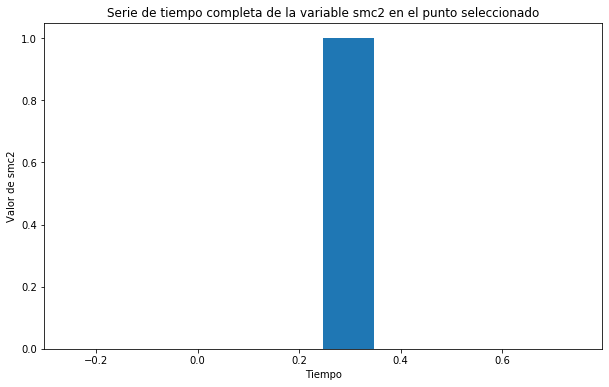

In [5]:
latitud_punto = 40.0  
longitud_punto = -75.0 

series_de_tiempo = []

for tiempo in ds['time']:
    punto_mas_cercano = ds.sel(time=tiempo, x=longitud_punto, y=latitud_punto, method='nearest')
    serie_tiempo = punto_mas_cercano['smc2']
    series_de_tiempo.append(serie_tiempo)

serie_tiempo_completa = xr.concat(series_de_tiempo, dim='time')

plt.figure(figsize=(10, 6))
serie_tiempo_completa.plot()
plt.title('Serie de tiempo completa de la variable smc2 en el punto seleccionado')
plt.xlabel('Tiempo')
plt.ylabel('Valor de smc2')
plt.show()


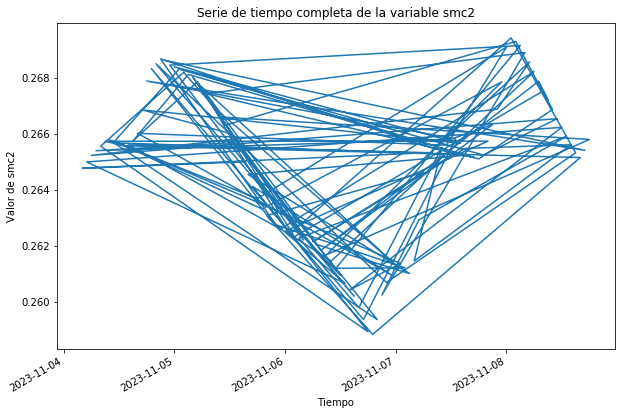

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

file_list = glob.glob('/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/*.nc')

datasets = [xr.open_dataset(f) for f in file_list]
ds = xr.concat(datasets, dim='time')

smc2_combined = ds['smc2']

plt.figure(figsize=(10, 6))
smc2_combined.mean(dim=['x', 'y']).plot()
plt.title('Serie de tiempo completa de la variable smc2')
plt.xlabel('Tiempo')
plt.ylabel('Valor de smc2')
plt.show()


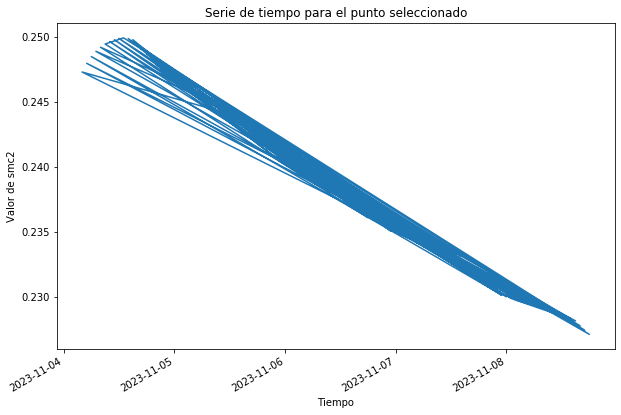

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

file_list = glob.glob('/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/*.nc')

datasets = [xr.open_dataset(f) for f in file_list]
ds = xr.concat(datasets, dim='time')

latitud_punto = 40.0  
longitud_punto = -75.0  

punto_mas_cercano = ds.sel(x=longitud_punto, y=latitud_punto, method='nearest')

smc2_punto = punto_mas_cercano['smc2']

plt.figure(figsize=(10, 6))
smc2_punto.plot.line(x='time')
plt.title('Serie de tiempo para el punto seleccionado')
plt.xlabel('Tiempo')
plt.ylabel('Valor de smc2')
plt.show()


# REPROYECCIÓN DE DATOS(WGS-84)


In [1]:
import subprocess
import os
os.chdir('/home/juantuf/Descargas/RESULTS_HYDROSJO/LSMOUT/.')
         
comando = 'ncview *.nc'

subprocess.Popen(comando, shell=True)


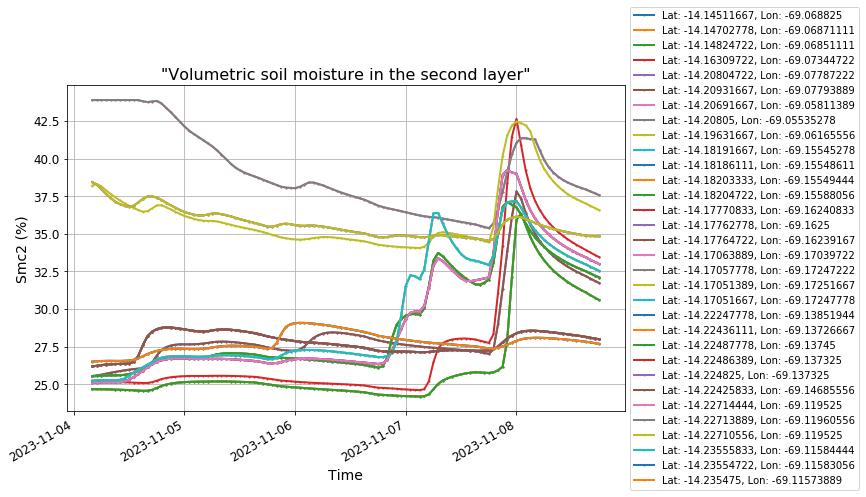

In [114]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

coordenadas = [
    (-14.14511667, -69.068825),
    (-14.14702778, -69.06871111),
    (-14.14824722, -69.06851111),
    (-14.16309722, -69.07344722),
    (-14.20804722, -69.07787222),
    (-14.20931667, -69.07793889),
    (-14.20691667, -69.05811389),
    (-14.20805, -69.05535278),
    (-14.19631667, -69.06165556),
    (-14.18191667, -69.15545278),
    (-14.18186111, -69.15548611),
    (-14.18203333, -69.15549444),
    (-14.18204722, -69.15588056),
    (-14.17770833, -69.16240833),
    (-14.17762778, -69.1625),
    (-14.17764722, -69.16239167),
    (-14.17063889, -69.17039722),
    (-14.17057778, -69.17247222),
    (-14.17051389, -69.17251667),
    (-14.17051667, -69.17247778),
    (-14.22247778, -69.13851944),
    (-14.22436111, -69.13726667),
    (-14.22487778, -69.13745),
    (-14.22486389, -69.137325),
    (-14.224825, -69.137325),
    (-14.22425833, -69.14685556),
    (-14.22714444, -69.119525),
    (-14.22713889, -69.11960556),
    (-14.22710556, -69.119525),
    (-14.23555833, -69.11584444),
    (-14.23554722, -69.11583056),
    (-14.235475, -69.11573889)
]

ruta_archivos = '/home/juantuf/Descargas/RESULTS_HYDROSJO/LSMOUT/'
patron_archivos = ruta_archivos + '*.nc'
ds = xr.open_mfdataset(patron_archivos)

plt.figure(figsize=(10, 6))

for latitud, longitud in coordenadas:
    x_punto, y_punto = reproyectar_punto(longitud, latitud, proj_mercator, proj_wgs84)
    smc2_punto = ds.sel(x=x_punto, y=y_punto, method='nearest')['smc2'] * 100
    smc2_punto.plot.line(x='time', linewidth=2, marker='o', markersize=1, label=f'Lat: {latitud}, Lon: {longitud}')

plt.title('"Volumetric soil moisture in the second layer"', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Smc2 (%)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True) 

plt.show()


In [1]:
import subprocess
import os

os.chdir("/home/juantuf/Descargas/RESULTS_HYDROSJO/.")
comando = 'ncview *.LDASOUT_DOMAIN2'
subprocess.Popen(comando, shell=True)
!pwd

/home/juantuf/Descargas/RESULTS_HYDROSJO


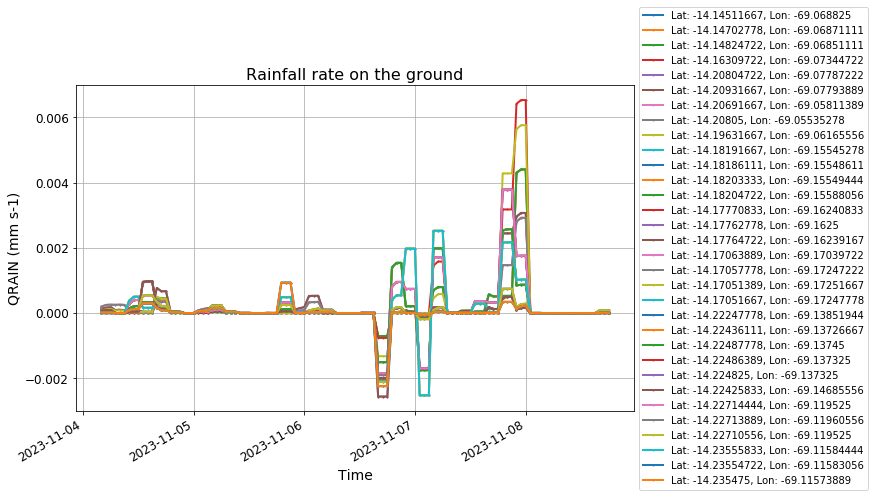

In [115]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

coordenadas = [
    (-14.14511667, -69.068825),
    (-14.14702778, -69.06871111),
    (-14.14824722, -69.06851111),
    (-14.16309722, -69.07344722),
    (-14.20804722, -69.07787222),
    (-14.20931667, -69.07793889),
    (-14.20691667, -69.05811389),
    (-14.20805, -69.05535278),
    (-14.19631667, -69.06165556),
    (-14.18191667, -69.15545278),
    (-14.18186111, -69.15548611),
    (-14.18203333, -69.15549444),
    (-14.18204722, -69.15588056),
    (-14.17770833, -69.16240833),
    (-14.17762778, -69.1625),
    (-14.17764722, -69.16239167),
    (-14.17063889, -69.17039722),
    (-14.17057778, -69.17247222),
    (-14.17051389, -69.17251667),
    (-14.17051667, -69.17247778),
    (-14.22247778, -69.13851944),
    (-14.22436111, -69.13726667),
    (-14.22487778, -69.13745),
    (-14.22486389, -69.137325),
    (-14.224825, -69.137325),
    (-14.22425833, -69.14685556),
    (-14.22714444, -69.119525),
    (-14.22713889, -69.11960556),
    (-14.22710556, -69.119525),
    (-14.23555833, -69.11584444),
    (-14.23554722, -69.11583056),
    (-14.235475, -69.11573889)
]



ruta_archivos = '/home/juantuf/Descargas/RESULTS_HYDROSJO/'
patron_archivos = ruta_archivos + '*.LDASOUT_DOMAIN2'
ds = xr.open_mfdataset(patron_archivos)

plt.figure(figsize=(10, 6))

for latitud, longitud in coordenadas:
    x_punto, y_punto = reproyectar_punto(longitud, latitud, proj_mercator, proj_wgs84)
    smc2_punto = ds.sel(x=x_punto, y=y_punto, method='nearest')['QRAIN'] 
    smc2_punto.plot.line(x='time', linewidth=2, marker='o', markersize=1, label=f'Lat: {latitud}, Lon: {longitud}')

plt.title('Rainfall rate on the ground', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('QRAIN (mm s-1)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True) 

plt.show()


## **PARA ESTA VARIABLE SE TUVO QUE REALIZAR UNA CORRECIÓN EN LA PROYECCIÓN** ##

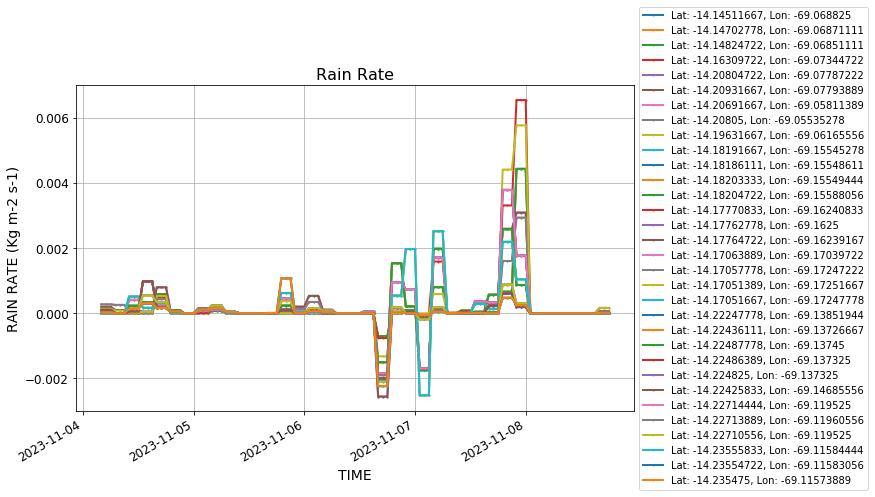

In [116]:
### GFS-Analysis DATASET WITH 2000 horizontal grid resolution

import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

coordenadas = [
    (-14.14511667, -69.068825),
    (-14.14702778, -69.06871111),
    (-14.14824722, -69.06851111),
    (-14.16309722, -69.07344722),
    (-14.20804722, -69.07787222),
    (-14.20931667, -69.07793889),
    (-14.20691667, -69.05811389),
    (-14.20805, -69.05535278),
    (-14.19631667, -69.06165556),
    (-14.18191667, -69.15545278),
    (-14.18186111, -69.15548611),
    (-14.18203333, -69.15549444),
    (-14.18204722, -69.15588056),
    (-14.17770833, -69.16240833),
    (-14.17762778, -69.1625),
    (-14.17764722, -69.16239167),
    (-14.17063889, -69.17039722),
    (-14.17057778, -69.17247222),
    (-14.17051389, -69.17251667),
    (-14.17051667, -69.17247778),
    (-14.22247778, -69.13851944),
    (-14.22436111, -69.13726667),
    (-14.22487778, -69.13745),
    (-14.22486389, -69.137325),
    (-14.224825, -69.137325),
    (-14.22425833, -69.14685556),
    (-14.22714444, -69.119525),
    (-14.22713889, -69.11960556),
    (-14.22710556, -69.119525),
    (-14.23555833, -69.11584444),
    (-14.23554722, -69.11583056),
    (-14.235475, -69.11573889)
]



ruta_archivos = '/home/juantuf/Descargas/RESULTS_HYDROSJO/'
patron_archivos = ruta_archivos + '*.LDASOUT_DOMAIN2'
ds = xr.open_mfdataset(patron_archivos)

plt.figure(figsize=(10, 6))

for latitud, longitud in coordenadas:
    x_punto, y_punto = reproyectar_punto(longitud, latitud, proj_mercator, proj_wgs84)
    smc2_punto = ds.sel(x=x_punto, y=y_punto, method='nearest')['RAINRATE'] 
    smc2_punto.plot.line(x='time', linewidth=2, marker='o', markersize=1, label=f'Lat: {latitud}, Lon: {longitud}')

plt.title('Rain Rate', fontsize=16)
plt.xlabel('TIME', fontsize=14)
plt.ylabel('RAIN RATE (Kg m-2 s-1)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True) 

plt.show()


In [2]:
### ERA 5 DATASET WITH 500 horizontal grid resolution

import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

coordenadas = [
    (-14.14511667, -69.068825),
    (-14.14702778, -69.06871111),
    (-14.14824722, -69.06851111),
    (-14.16309722, -69.07344722),
    (-14.20804722, -69.07787222),
    (-14.20931667, -69.07793889),
    (-14.20691667, -69.05811389),
    (-14.20805, -69.05535278),
]



ruta_archivos = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/'
patron_archivos = ruta_archivos + '*.LDASOUT_DOMAIN3'
ds = xr.open_mfdataset(patron_archivos)

plt.figure(figsize=(10, 6))

for latitud, longitud in coordenadas:
    x_punto, y_punto = reproyectar_punto(longitud, latitud, proj_mercator, proj_wgs84)
    smc2_punto = ds.sel(x=x_punto, y=y_punto, method='nearest')['RAINRATE'] 
    smc2_punto.plot.line(x='time', linewidth=2, marker='o', markersize=1, label=f'Lat: {latitud}, Lon: {longitud}')

plt.title('Rain Rate', fontsize=16)
plt.xlabel('TIME', fontsize=14)
plt.ylabel('RAIN RATE (Kg m-2 s-1)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True) 

plt.show()


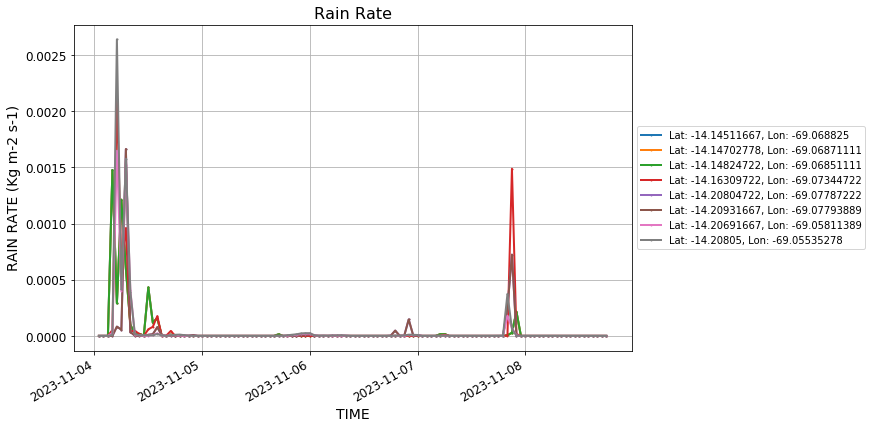

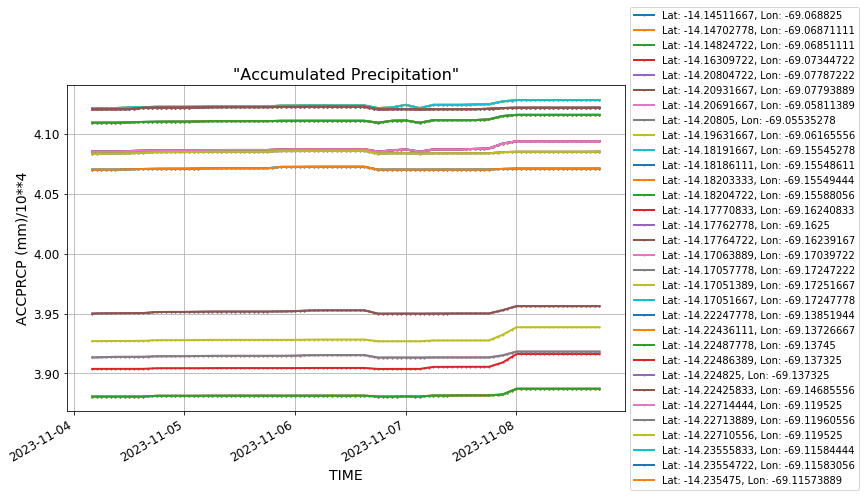

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

coordenadas = [
    (-14.14511667, -69.068825),
    (-14.14702778, -69.06871111),
    (-14.14824722, -69.06851111),
    (-14.16309722, -69.07344722),
    (-14.20804722, -69.07787222),
    (-14.20931667, -69.07793889),
    (-14.20691667, -69.05811389),
    (-14.20805, -69.05535278),
    (-14.19631667, -69.06165556),
    (-14.18191667, -69.15545278),
    (-14.18186111, -69.15548611),
    (-14.18203333, -69.15549444),
    (-14.18204722, -69.15588056),
    (-14.17770833, -69.16240833),
    (-14.17762778, -69.1625),
    (-14.17764722, -69.16239167),
    (-14.17063889, -69.17039722),
    (-14.17057778, -69.17247222),
    (-14.17051389, -69.17251667),
    (-14.17051667, -69.17247778),
    (-14.22247778, -69.13851944),
    (-14.22436111, -69.13726667),
    (-14.22487778, -69.13745),
    (-14.22486389, -69.137325),
    (-14.224825, -69.137325),
    (-14.22425833, -69.14685556),
    (-14.22714444, -69.119525),
    (-14.22713889, -69.11960556),
    (-14.22710556, -69.119525),
    (-14.23555833, -69.11584444),
    (-14.23554722, -69.11583056),
    (-14.235475, -69.11573889)
]



ruta_archivos = '/home/juantuf/Descargas/RESULTS_HYDROSJO/'
patron_archivos = ruta_archivos + '*.LDASOUT_DOMAIN2'
ds = xr.open_mfdataset(patron_archivos)

plt.figure(figsize=(10, 6))

for latitud, longitud in coordenadas:
    x_punto, y_punto = reproyectar_punto(longitud, latitud, proj_mercator, proj_wgs84)
    smc2_punto = ds.sel(x=x_punto, y=y_punto, method='nearest')['ACCPRCP']*10**-4
    smc2_punto.plot.line(x='time', linewidth=2, marker='o', markersize=1, label=f'Lat: {latitud}, Lon: {longitud}')

plt.title('"Accumulated Precipitation"', fontsize=16)
plt.xlabel('TIME', fontsize=14)
plt.ylabel('ACCPRCP (mm)/10**4', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True) 

plt.show()


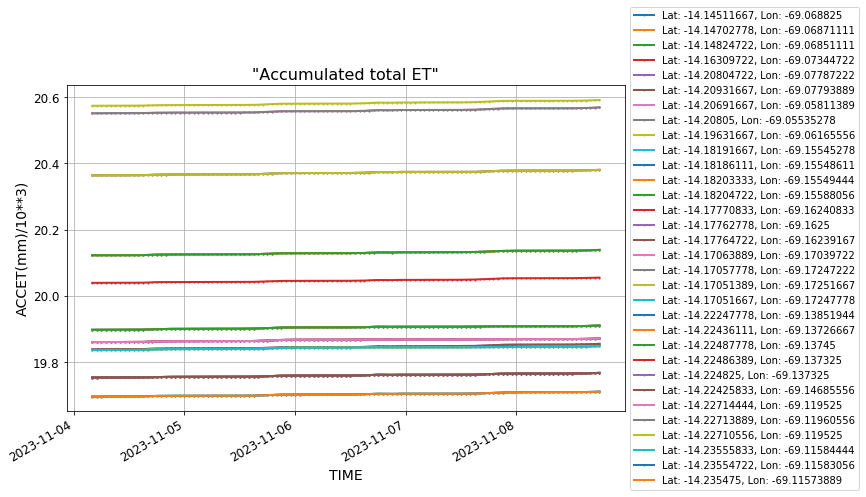

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

coordenadas = [
    (-14.14511667, -69.068825),
    (-14.14702778, -69.06871111),
    (-14.14824722, -69.06851111),
    (-14.16309722, -69.07344722),
    (-14.20804722, -69.07787222),
    (-14.20931667, -69.07793889),
    (-14.20691667, -69.05811389),
    (-14.20805, -69.05535278),
    (-14.19631667, -69.06165556),
    (-14.18191667, -69.15545278),
    (-14.18186111, -69.15548611),
    (-14.18203333, -69.15549444),
    (-14.18204722, -69.15588056),
    (-14.17770833, -69.16240833),
    (-14.17762778, -69.1625),
    (-14.17764722, -69.16239167),
    (-14.17063889, -69.17039722),
    (-14.17057778, -69.17247222),
    (-14.17051389, -69.17251667),
    (-14.17051667, -69.17247778),
    (-14.22247778, -69.13851944),
    (-14.22436111, -69.13726667),
    (-14.22487778, -69.13745),
    (-14.22486389, -69.137325),
    (-14.224825, -69.137325),
    (-14.22425833, -69.14685556),
    (-14.22714444, -69.119525),
    (-14.22713889, -69.11960556),
    (-14.22710556, -69.119525),
    (-14.23555833, -69.11584444),
    (-14.23554722, -69.11583056),
    (-14.235475, -69.11573889)
]



ruta_archivos = '/home/juantuf/Descargas/RESULTS_HYDROSJO/'
patron_archivos = ruta_archivos + '*.LDASOUT_DOMAIN2'
ds = xr.open_mfdataset(patron_archivos)

plt.figure(figsize=(10, 6))

for latitud, longitud in coordenadas:
    x_punto, y_punto = reproyectar_punto(longitud, latitud, proj_mercator, proj_wgs84)
    smc2_punto = ds.sel(x=x_punto, y=y_punto, method='nearest')['ACCET']*10**-3
    smc2_punto.plot.line(x='time', linewidth=2, marker='o', markersize=1, label=f'Lat: {latitud}, Lon: {longitud}')

plt.title('"Accumulated total ET"', fontsize=16)
plt.xlabel('TIME', fontsize=14)
plt.ylabel('ACCET(mm)/10**3)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True) 

plt.show()


# Revisar a mayor profundidad metadato

In [3]:
import xarray as xr

ruta_archivos = '/home/juantuf/Descargas/RESULTS_HYDROSJO/'
patron_archivos = ruta_archivos + '*.LDASOUT_DOMAIN2'
ds = xr.open_mfdataset(patron_archivos, combine='by_coords')

print(ds)
print(ds.variables)


<xarray.Dataset>
Dimensions:         (time: 111, reference_time: 1, x: 145, y: 95, snow_layers: 3, soil_layers_stag: 4, vis_nir: 2)
Coordinates:
  * time            (time) datetime64[ns] 2023-11-04T04:00:00 ... 2023-11-08T...
  * reference_time  (reference_time) datetime64[ns] 2023-11-04T03:00:00
  * x               (x) float64 -1.44e+05 -1.42e+05 ... 1.42e+05 1.44e+05
  * y               (y) float64 -1.639e+06 -1.637e+06 ... -1.453e+06 -1.451e+06
Dimensions without coordinates: snow_layers, soil_layers_stag, vis_nir
Data variables: (12/98)
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    IVGTYP          (time, y, x) float32 dask.array<chunksize=(1, 95, 145), meta=np.ndarray>
    ISLTYP          (time, y, x) float32 dask.array<chunksize=(1, 95, 145), meta=np.ndarray>
    FVEG            (time, y, x) float32 dask.array<chunksize=(1, 95, 145), meta=np.ndarray>
    LAI             (time, y, x) float32 dask.array<chunksize=(1, 95, 145), meta=np.ndarray>
  

In [87]:
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

coordenadas = [
    (-14.14511667, -69.068825),
    # otras coordenadas...
]

for latitud, longitud in coordenadas:
    x_punto, y_punto = reproyectar_punto(longitud, latitud, proj_mercator, proj_wgs84)
    print(f"Original: ({latitud}, {longitud}) -> Reproyectado: ({x_punto}, {y_punto})")


Original: (-14.14511667, -69.068825) -> Reproyectado: (44103.02675907625, -1540362.6223056389)


In [60]:
ds = xr.open_dataset('/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/202311040500.LDASOUT_DOMAIN2')

# print(ds)

# # print("\nDimensiones:")
# print(ds.dims)


print("\nVariables:")
print(ds.data_vars)


Variables:
Data variables:
    crs          |S1 ...
    IVGTYP       (time, y, x) float32 ...
    ISLTYP       (time, y, x) float32 ...
    FVEG         (time, y, x) float32 ...
    LAI          (time, y, x) float32 ...
    SAI          (time, y, x) float32 ...
    SWFORC       (time, y, x) float32 ...
    COSZ         (time, y, x) float32 ...
    LWFORC       (time, y, x) float32 ...
    RAINRATE     (time, y, x) float32 ...
    EMISS        (time, y, x) float32 ...
    FSA          (time, y, x) float32 ...
    FIRA         (time, y, x) float32 ...
    GRDFLX       (time, y, x) float32 ...
    HFX          (time, y, x) float32 ...
    LH           (time, y, x) float32 ...
    ECAN         (time, y, x) float32 ...
    EDIR         (time, y, x) float32 ...
    ALBEDO       (time, y, x) float32 ...
    ETRAN        (time, y, x) float32 ...
    UGDRNOFF     (time, y, x) float32 ...
    CANLIQ       (time, y, x) float32 ...
    CANICE       (time, y, x) float32 ...
    ZWT          (time,

In [90]:
# pip install --upgrade xarray netCDF4 dask
# 

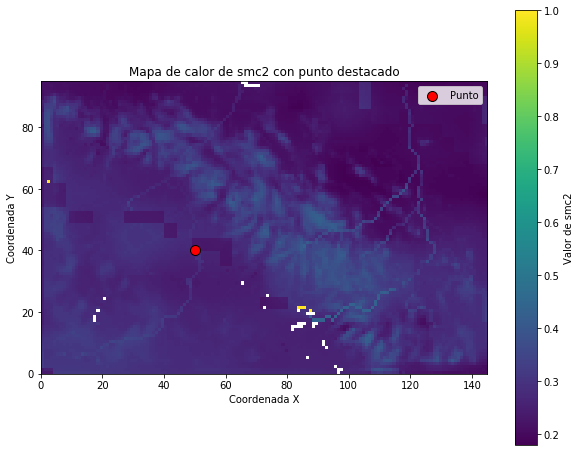

In [191]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
    transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
    x, y = transformer.transform(lon, lat)
    return x, y

proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
proj_mercator = Proj(proj_str)
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

# longitud_punto = -69.11573889  
# latitud_punto = -14.235475  

x_punto, y_punto = reproyectar_punto(longitud_punto, latitud_punto, proj_mercator, proj_wgs84)

ruta_archivo = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/202311080000.LSMOUT_DOMAIN2.nc'

ds = xr.open_dataset(ruta_archivo)

tiempo_seleccionado = ds['time'][0]

datos_smc2 = ds['smc2'].sel(time=tiempo_seleccionado).values

o

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
plt.imshow(datos_smc2, cmap='viridis', origin='lower', extent=[0, datos_smc2.shape[1], 0, datos_smc2.shape[0]])
plt.colorbar(label='Valor de smc2')
plt.scatter(coordenada_x_punto, coordenada_y_punto, s=100, c='red', marker='o', label='Punto', edgecolor='black')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Mapa de calor de smc2 con punto destacado')
plt.legend()
plt.show()


In [46]:
y_punto

-1546463.9431779822

In [ ]:
punto_x = 0.2770674522066938 
punto_y = -1545352.7342199672  


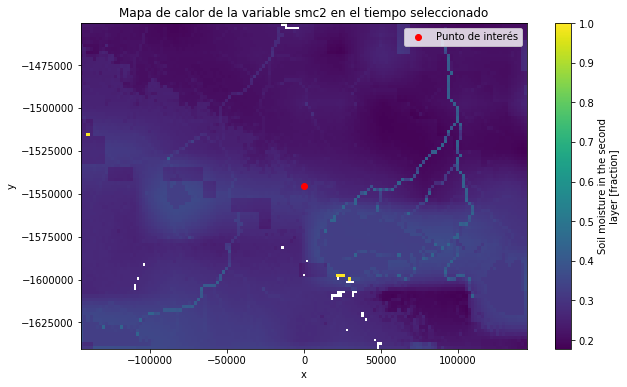

In [56]:
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))

datos_seleccionados.plot()



plt.scatter(punto_x, punto_y, color='red', label='Punto de interés')
palette = 'plasma'  
plt.set_cmap(palette)
plt.legend()

plt.title('Mapa de calor de la variable smc2 en el tiempo seleccionado')
plt.xlabel('x')
plt.ylabel('y')

plt.show()



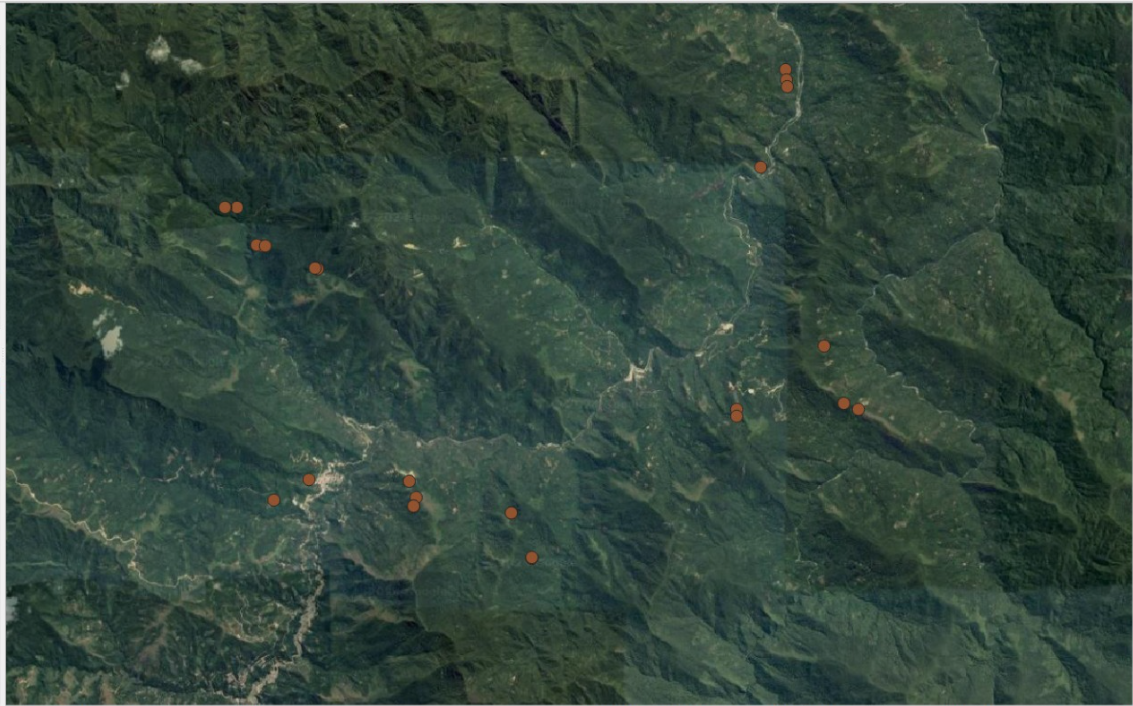

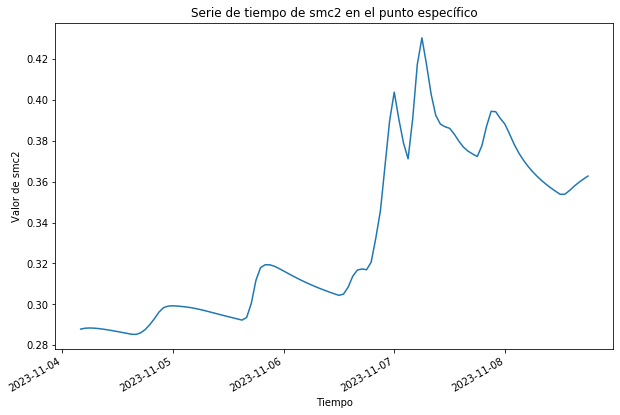

In [36]:
import xarray as xr
import matplotlib.pyplot as plt
 
ruta_archivos = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/'

patron_archivos = ruta_archivos + '*.nc'

ds = xr.open_mfdataset(patron_archivos)

latitud_punto = -1545352.7342199672
longitud_punto = 0.2770674522066938
# latitud_punto = -1545352.7342199672
# longitud_punto = 0.2770674522066938
smc2_punto = ds.sel(x=longitud_punto, y=latitud_punto, method='nearest')['smc2']

plt.figure(figsize=(10, 6))
smc2_punto.plot.line(x='time')
plt.title('Serie de tiempo de smc2 en el punto específico')
plt.xlabel('Tiempo')
plt.ylabel('Valor de smc2')
plt.show()


/home/alexis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>


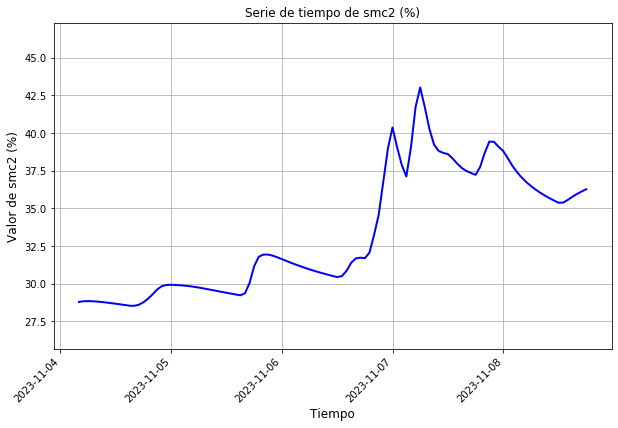

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

ruta_archivos = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/'
patron_archivos = ruta_archivos + '*.nc'

ds = xr.open_mfdataset(patron_archivos)

latitud_punto = -1545352.7342199672
longitud_punto = 0.2770674522066938

smc2_punto = ds.sel(x=longitud_punto, y=latitud_punto, method='nearest')['smc2']

smc2_punto = smc2_punto * 100

plt.figure(figsize=(10, 6))
smc2_punto.plot.line(x='time', linestyle='-', color='blue', linewidth=2)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  
plt.title('Serie de tiempo de smc2 (%)')
plt.xlabel('Tiempo')
plt.ylabel('Valor de smc2')
plt.grid(True)  

y_min = smc2_punto.min() * 0.9
y_max = smc2_punto.max() * 1.1
plt.ylim(y_min, y_max)

plt.xticks(rotation=45, fontsize=10)
plt.locator_params(axis='x', tight=True, nbins=10) 

plt.yticks(fontsize=10)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Valor de smc2 (%)', fontsize=12)

plt.show()


### ================================================================================================================== ###
### **Enhanced outputs version-volumetric soil parameter with GFS-Analysis and ERA-5 Reanalys initial conditions** ###
### ================================================================================================================== ###


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, transform

ruta_archivos = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/LSMOUT_GFS/'
patron_archivos = ruta_archivos + '*.LSMOUT_DOMAIN3'

ds = xr.open_mfdataset(patron_archivos)

latitud_grados = -13.81361  
longitud_grados = -69.72437

proj_wgs84 = Proj('epsg:4326')

proj_mercator = Proj(proj='merc', a=6370000.0, b=6370000.0, lat_ts=-14.19, lon_0=-69.478, units='m')

longitud_proy, latitud_proy = transform(proj_wgs84, proj_mercator, longitud_grados, latitud_grados)

print(f"Coordenadas transformadas al sistema Mercator:\nLatitud proyectada: {latitud_proy}\nLongitud proyectada: {longitud_proy}")

smc2_punto = ds.sel(x=longitud_proy, y=latitud_proy, method='nearest')['smc2']

smc2_punto = smc2_punto * 100

plt.figure(figsize=(10, 6))
smc2_punto.plot.line(x='time', linestyle='-', color='blue', linewidth=2)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Serie de tiempo de smc2 (%)')
plt.xlabel('Tiempo')
plt.ylabel('Valor de smc2')
plt.grid(True)

y_min = smc2_punto.min() * 0.995
y_max = smc2_punto.max() * 1.005
plt.ylim(y_min, y_max)


plt.xticks(rotation=45, fontsize=10)
plt.locator_params(axis='x', tight=True, nbins=10)

plt.yticks(fontsize=10)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Valor de smc2 (%)', fontsize=12)

plt.show()


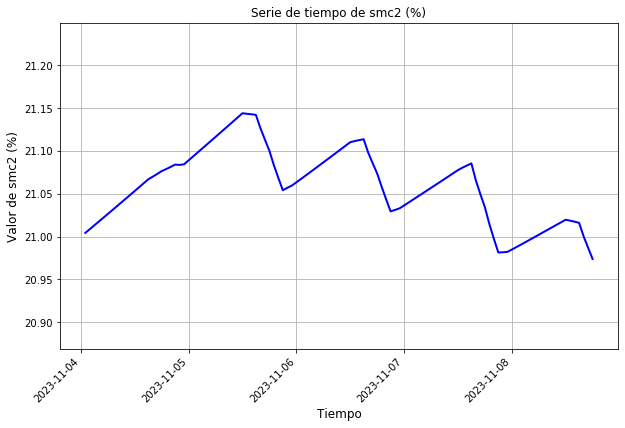

==================================================================================
### WRF-Hydro volumetric soild parameter visualization-With ERA-5 v.s GFS Analysis ###
==================================================================================

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj, transform

ruta_archivos_gfs = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/LSMOUT_GFS/'
ruta_archivos_era = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/LSMOUT_ERA/'

patron_archivos_gfs = ruta_archivos_gfs + '*.LSMOUT_DOMAIN3'
patron_archivos_era = ruta_archivos_era + '*.LSMOUT_DOMAIN3'

ds_gfs = xr.open_mfdataset(patron_archivos_gfs)
ds_era = xr.open_mfdataset(patron_archivos_era)

latitud_grados = -14.229615000000004  
longitud_grados = -69.36000500000002

proj_wgs84 = Proj('epsg:4326')
proj_mercator = Proj(proj='merc', a=6370000.0, b=6370000.0, lat_ts=-14.19, lon_0=-69.478, units='m')

longitud_proy, latitud_proy = transform(proj_wgs84, proj_mercator, longitud_grados, latitud_grados)

smc2_punto_gfs = ds_gfs.sel(x=longitud_proy, y=latitud_proy, method='nearest')['smc2'] * 100
smc2_punto_era = ds_era.sel(x=longitud_proy, y=latitud_proy, method='nearest')['smc2'] * 100

plt.figure(figsize=(10, 6))

smc2_punto_gfs.plot.line(x='time', linestyle='-', color='blue', linewidth=2, label='GFS-Analysis')
smc2_punto_era.plot.line(x='time', linestyle='-', color='red', linewidth=2, label='ERA-5')

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Comparación de serie smc2 (%)')
plt.xlabel('Tiempo')
plt.ylabel('Valor de smc2 (%)')
plt.grid(True)

y_min = min(smc2_punto_gfs.min(), smc2_punto_era.min()) * 0.995
y_max = max(smc2_punto_gfs.max(), smc2_punto_era.max()) * 1.005
plt.ylim(y_min, y_max)

plt.xticks(rotation=45, fontsize=10)
plt.locator_params(axis='x', tight=True, nbins=10)

plt.yticks(fontsize=10)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('SMC2 (%)', fontsize=12)

plt.legend()
plt.show()


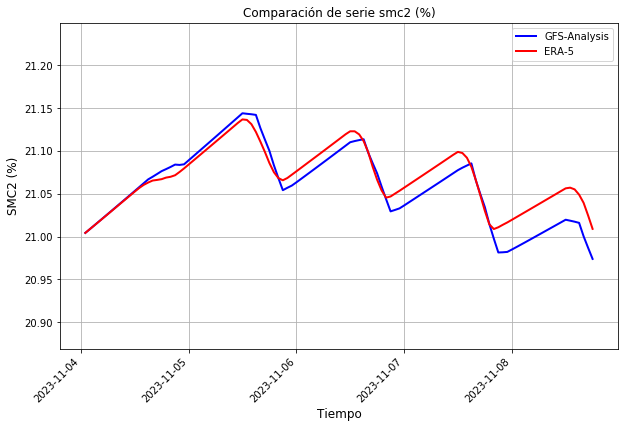

In [21]:
# pip install --upgrade ipywidgets

In [164]:
# import xarray as xr
# import matplotlib.pyplot as plt
# from netCDF4 import Dataset
# from pyproj import Proj, Transformer
# import numpy as np
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go

# def reproyectar_punto(lon, lat, proj_mercator, proj_wgs84):
#     transformer = Transformer.from_proj(proj_wgs84, proj_mercator)
#     x, y = transformer.transform(lon, lat)
#     return x, y

# # Definir las proyecciones
# proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
# proj_mercator = Proj(proj_str)
# proj_wgs84 = Proj(proj='latlong', datum='WGS84')

# # Punto específico en coordenadas geográficas
# longitud_punto = -69.11573889  
# latitud_punto = -14.235475  

# # Reproyectar el punto a las coordenadas del sistema original
# x_punto, y_punto = reproyectar_punto(longitud_punto, latitud_punto, proj_mercator, proj_wgs84)

# # Cargar los datos de los archivos netCDF
# ruta_archivos = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/'
# patron_archivos = ruta_archivos + '*.nc'
# ds = xr.open_mfdataset(patron_archivos, combine='by_coords')

# # Seleccionar la variable 'smc2'
# smc2 = ds['smc2']*100  # Multiplicar por 100 para la conversión deseada

# # Extraer el tiempo
# times = smc2.time.values

# # Obtener valores mínimo y máximo de smc2 para establecer los límites del color
# zmin = smc2.min().values.item()  # Convertir a un escalar
# zmax = smc2.max().values.item()  # Convertir a un escalar

# # Crear una figura interactiva con plotly
# fig = go.Figure()

# # Añadir un mapa de calor para cada momento en el tiempo
# for t in times:
#     smc2_t = smc2.sel(time=t)
#     fig.add_trace(go.Heatmap(
#         z=smc2_t.values,
#         x=smc2_t.x.values,
#         y=smc2_t.y.values,
#         colorscale='Plasma',
#         zmin=zmin,
#         zmax=zmax,
#         colorbar=dict(title='smc2 (%)'),
#         visible=False
#     ))

# # Añadir un scatter plot para el punto de interés
# fig.add_trace(go.Scatter(
#     x=[x_punto],
#     y=[y_punto],
#     mode='markers',
#     marker=dict(color='red', size=10),
#     name='Punto de interés'
# ))

# # Establecer el primer frame como visible
# fig.data[0].visible = True

# # Crear botones para interactuar con los diferentes tiempos
# steps = []
# for i in range(len(times)):
#     step = dict(
#         method='update',
#         args=[{'visible': [False] * len(fig.data)},
#               {'title': f'Mapa de calor de la variable smc2 en {str(times[i])}'}],
#     )
#     step['args'][0]['visible'][i] = True
#     step['args'][0]['visible'][-1] = True  # Punto de interés siempre visible
#     steps.append(step)

# sliders = [dict(
#     active=0,
#     pad={"t": 50},
#     steps=steps
# )]

# fig.update_layout(
#     sliders=sliders,
#     title='Mapa de calor de la variable smc2 en el tiempo seleccionado',
#     xaxis_title='x',
#     yaxis_title='y'
# )

# fig.show()


In [165]:
# pip install bokeh


In [166]:
# import xarray as xr
# import numpy as np
# from pyproj import Proj, Transformer
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure
# from bokeh.models import ColumnDataSource, Slider, LinearColorMapper

# output_notebook()

# # Definir las proyecciones
# proj_str = "+proj=merc +units=m +a=6370000.0 +b=6370000.0 +lon_0=-69.478 +lat_ts=-14.19"
# proj_mercator = Proj(proj_str)
# proj_wgs84 = Proj(proj='latlong', datum='WGS84')

# # Cargar los datos de los archivos netCDF
# ruta_archivos = '/home/alexis/Escritorio/home/wrf_hydro-5.2.0/trunk/NDHMS/Run/RESULTS/TEST_CEFFORA_NOV23/LSMOUT/'
# patron_archivos = ruta_archivos + '*.nc'
# ds = xr.open_mfdataset(patron_archivos, combine='by_coords')

# # Seleccionar la variable 'smc2'
# smc2 = ds['smc2'] * 100  # Multiplicar por 100 para la conversión deseada

# # Extraer el tiempo
# times = smc2.time.values

# # Crear una figura de Bokeh
# p = figure(title=f'Mapa de calor de la variable smc2', x_axis_label='x', y_axis_label='y',
#            tools="pan,wheel_zoom,box_zoom,reset")

# # Obtener los valores de coordenadas x e y
# x_values = smc2.x.values
# y_values = smc2.y.values

# # Obtener el valor máximo de la variable smc2 para establecer los límites del color
# zmax = smc2.max().values.item()

# # Crear una fuente de datos para el mapa de calor
# heatmap_source = ColumnDataSource(data=dict(image=[smc2.isel(time=0).values],
#                                             x=[x_values.min()], y=[y_values.min()],
#                                             dw=[np.ptp(x_values)], dh=[np.ptp(y_values)]))

# # Configurar el mapeador de colores lineales
# color_mapper = LinearColorMapper(palette="Viridis256", low=0, high=zmax)

# # Añadir el mapa de calor al gráfico
# p.image(image='image', x='x', y='y', dw='dw', dh='dh', source=heatmap_source, color_mapper=color_mapper)

# # Crear un control deslizante para seleccionar el tiempo
# slider = Slider(start=0, end=len(times)-1, value=0, step=1, title="Time Step")

# # Definir la función de actualización
# def update(attr, old, new):
#     time_index = slider.value
#     print("Tiempo seleccionado:", str(times[time_index]))
#     new_data = dict(image=[smc2.isel(time=time_index).values],
#                     x=[x_values.min()], y=[y_values.min()],
#                     dw=[np.ptp(x_values)], dh=[np.ptp(y_values)])
#     heatmap_source.data = new_data
#     p.title.text = f'Mapa de calor de la variable smc2 en {str(times[time_index])}'

# # Añadir la actualización al control deslizante
# slider.on_change('value', update)

# # Mostrar el gráfico
# show(layout([[p], [widgetbox(slider)]]))


In [167]:
# nombres_archivos = [
#     '202311040400.LSMOUT_DOMAIN2.nc', '202311061300.LSMOUT_DOMAIN2.nc',
#     '202311040500.LSMOUT_DOMAIN2.nc', '202311061400.LSMOUT_DOMAIN2.nc',
#     '202311040600.LSMOUT_DOMAIN2.nc', '202311061500.LSMOUT_DOMAIN2.nc',
#     '202311040700.LSMOUT_DOMAIN2.nc', '202311061600.LSMOUT_DOMAIN2.nc',
#     '202311040800.LSMOUT_DOMAIN2.nc', '202311061700.LSMOUT_DOMAIN2.nc',
#     '202311040900.LSMOUT_DOMAIN2.nc', '202311061800.LSMOUT_DOMAIN2.nc',
#     '202311041000.LSMOUT_DOMAIN2.nc', '202311061900.LSMOUT_DOMAIN2.nc',
#     '202311041100.LSMOUT_DOMAIN2.nc', '202311062000.LSMOUT_DOMAIN2.nc',
#     '202311041200.LSMOUT_DOMAIN2.nc', '202311062100.LSMOUT_DOMAIN2.nc',
#     '202311041300.LSMOUT_DOMAIN2.nc', '202311062200.LSMOUT_DOMAIN2.nc',
#     '202311041400.LSMOUT_DOMAIN2.nc', '202311062300.LSMOUT_DOMAIN2.nc',
#     '202311041500.LSMOUT_DOMAIN2.nc', '202311070000.LSMOUT_DOMAIN2.nc',
#     '202311041600.LSMOUT_DOMAIN2.nc', '202311070100.LSMOUT_DOMAIN2.nc',
#     '202311041700.LSMOUT_DOMAIN2.nc', '202311070200.LSMOUT_DOMAIN2.nc',
#     '202311041800.LSMOUT_DOMAIN2.nc', '202311070300.LSMOUT_DOMAIN2.nc',
#     '202311041900.LSMOUT_DOMAIN2.nc', '202311070400.LSMOUT_DOMAIN2.nc',
#     '202311042000.LSMOUT_DOMAIN2.nc', '202311070500.LSMOUT_DOMAIN2.nc',
#     '202311042100.LSMOUT_DOMAIN2.nc', '202311070600.LSMOUT_DOMAIN2.nc',
#     '202311042200.LSMOUT_DOMAIN2.nc', '202311070700.LSMOUT_DOMAIN2.nc',
#     '202311042300.LSMOUT_DOMAIN2.nc', '202311070800.LSMOUT_DOMAIN2.nc',
#     '202311050000.LSMOUT_DOMAIN2.nc', '202311070900.LSMOUT_DOMAIN2.nc',
#     '202311050100.LSMOUT_DOMAIN2.nc', '202311071000.LSMOUT_DOMAIN2.nc',
#     '202311050200.LSMOUT_DOMAIN2.nc', '202311071100.LSMOUT_DOMAIN2.nc',
#     '202311050300.LSMOUT_DOMAIN2.nc', '202311071200.LSMOUT_DOMAIN2.nc',
#     '202311050400.LSMOUT_DOMAIN2.nc', '202311071300.LSMOUT_DOMAIN2.nc',
#     '202311050500.LSMOUT_DOMAIN2.nc', '202311071400.LSMOUT_DOMAIN2.nc',
#     '202311050600.LSMOUT_DOMAIN2.nc', '202311071500.LSMOUT_DOMAIN2.nc',
#     '202311050700.LSMOUT_DOMAIN2.nc', '202311071600.LSMOUT_DOMAIN2.nc',
#     '202311050800.LSMOUT_DOMAIN2.nc', '202311071700.LSMOUT_DOMAIN2.nc',
#     '202311050900.LSMOUT_DOMAIN2.nc', '202311071800.LSMOUT_DOMAIN2.nc',
#     '202311051000.LSMOUT_DOMAIN2.nc', '202311071900.LSMOUT_DOMAIN2.nc',
#     '202311051100.LSMOUT_DOMAIN2.nc', '202311072000.LSMOUT_DOMAIN2.nc',
#     '202311051200.LSMOUT_DOMAIN2.nc', '202311072100.LSMOUT_DOMAIN2.nc',
#     '202311051300.LSMOUT_DOMAIN2.nc', '202311072200.LSMOUT_DOMAIN2.nc',
#     '202311051400.LSMOUT_DOMAIN2.nc', '202311072300.LSMOUT_DOMAIN2.nc',
#     '202311051500.LSMOUT_DOMAIN2.nc', '202311080000.LSMOUT_DOMAIN2.nc',
#     '202311051600.LSMOUT_DOMAIN2.nc', '202311080100.LSMOUT_DOMAIN2.nc',
#     '202311051700.LSMOUT_DOMAIN2.nc', '202311080200.LSMOUT_DOMAIN2.nc',
#     '202311051800.LSMOUT_DOMAIN2.nc', '202311080300.LSMOUT_DOMAIN2.nc',
#     '202311051900.LSMOUT_DOMAIN2.nc', '202311080400.LSMOUT_DOMAIN2.nc',
#     '202311052000.LSMOUT_DOMAIN2.nc', '202311080500.LSMOUT_DOMAIN2.nc',
#     '202311052100.LSMOUT_DOMAIN2.nc', '202311080600.LSMOUT_DOMAIN2.nc',
#     '202311052200.LSMOUT_DOMAIN2.nc', '202311080700.LSMOUT_DOMAIN2.nc',
#     '202311052300.LSMOUT_DOMAIN2.nc', '202311080800.LSMOUT_DOMAIN2.nc',
#     '202311060000.LSMOUT_DOMAIN2.nc', '202311080900.LSMOUT_DOMAIN2.nc',
#     '202311060100.LSMOUT_DOMAIN2.nc', '202311081000.LSMOUT_DOMAIN2.nc',
#     '202311060200.LSMOUT_DOMAIN2.nc', '202311081100.LSMOUT_DOMAIN2.nc',
#     '202311060300.LSMOUT_DOMAIN2.nc', '202311081200.LSMOUT_DOMAIN2.nc',
#     '202311060400.LSMOUT_DOMAIN2.nc', '202311081300.LSMOUT_DOMAIN2.nc',
#     '202311060500.LSMOUT_DOMAIN2.nc', '202311081400.LSMOUT_DOMAIN2.nc',
#     '202311060600.LSMOUT_DOMAIN2.nc', '202311081500.LSMOUT_DOMAIN2.nc',
#     '202311060700.LSMOUT_DOMAIN2.nc', '202311081600.LSMOUT_DOMAIN2.nc',
#     '202311060800.LSMOUT_DOMAIN2.nc', '202311081700.LSMOUT_DOMAIN2.nc',
#     '202311060900.LSMOUT_DOMAIN2.nc', '202311081800.LSMOUT_DOMAIN2.nc',
#     '202311061000.LSMOUT_DOMAIN2.nc', '202311061100.LSMOUT_DOMAIN2.nc',
#     '202311061200.LSMOUT_DOMAIN2.nc'
# ]


In [64]:
# !pip install plotly
# conda install -c conda-forge nodejs
